In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import re
import hashlib
import numpy as np
from matplotlib import rc
from ProjectAnalysis import ProjectAnalysis

In [2]:
common_errors = [
    'error: (.+)\n(.+)',
    'build.xml does not exist'
]
pa = ProjectAnalysis("Closure",  1)

In [3]:
pa.df().head()

,id,commit,build,exec_time,comment,fix,lastFix
0,0,49e9565f,SUCCESS,10.0,Shut off i18n warnings if the user didn't ask ...,{},NaN
1,1,aae547f4,SUCCESS,16.0,Don't try to process jsdoc nodes twice. Fixes ...,{},NaN
2,2,acd31d12,SUCCESS,16.0,Add function to detect namespace declarations....,{},NaN
3,3,e9bbaba7,SUCCESS,16.0,Remove trailing whitespace ------------- Creat...,{},NaN
4,4,7b116a69,SUCCESS,16.0,Externs version rollover dance for Maps API V3...,{},NaN


## Calculate the number of builds of each type

In [4]:
pa.df()[(pa.df()['build'] == 'SUCCESS')].count()

id           2855
commit       2855
build        2855
exec_time    2855
comment      2855
fix          2855
lastFix         0
dtype: int64

In [5]:
pa.df()[(pa.df()['build'] == 'FAIL')].count()

id           3
commit       3
build        3
exec_time    3
comment      3
fix          3
lastFix      0
dtype: int64

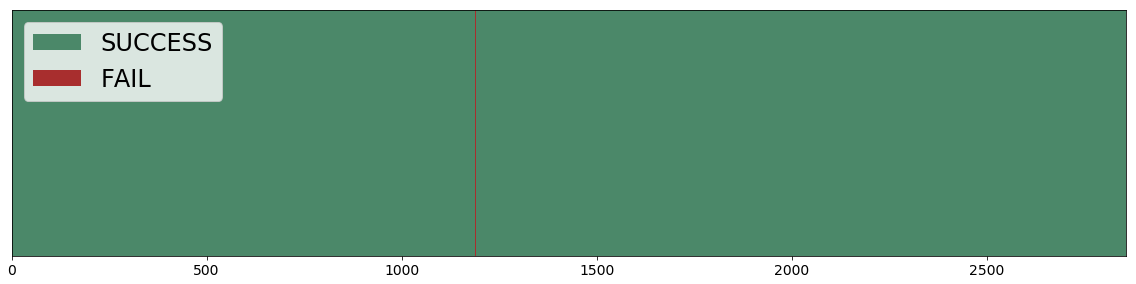

In [6]:
pa.plot_and_save_histogram(1)

## We collect all the fails, separate them in groups and obtain the logs of each commit for failed builds

In [7]:
fails, groups_of_fails = pa.get_fails_and_grouped_fails()

In [8]:
errors = pa.group_errors_by_log(fails, common_errors)

In [9]:
df = pd.DataFrame.from_dict(errors, orient='index')
df=df.groupby(['key','trace']).agg({'count': 'sum'}).sort_values(by=['count'], ascending=False)
df.to_csv("errors.csv", sep='\t', encoding='utf-8')
df

,,count
key,trace,
1f111130064db34efbba96a01f6809f0,error: package com.google.javascript.jscomp.regex does not exist [javac] import com.google.javascript.jscomp.regex.RegExpTree;,1
6f2030077ee1c5ec72be5495b7ea5614,build.xml does not exist,1
a041081c632eb008489266c38ce448d0,error: LineMapping is not abstract and does not override abstract method newBuilderForType(BuilderParent) in GeneratedMessage [javac] public static final class LineMapping extends,1


In [10]:
pa.view_log_by_hash(errors,'1f111130064db34efbba96a01f6809f0', 0)

Total commits: 1 | Current commit: 8f4b1746 | Log: 

Buildfile: /home/michel/Investigacion/bugs/projects/Closure/build.xml

svnversion:

compile:
    [mkdir] Created dir: /home/michel/Investigacion/bugs/projects/Closure/build/classes
    [javac] /home/michel/Investigacion/bugs/projects/Closure/build.xml:185: warning: 'includeantruntime' was not set, defaulting to build.sysclasspath=last; set to false for repeatable builds
    [javac] Compiling 5 source files to /home/michel/Investigacion/bugs/projects/Closure/build/classes
    [javac] warning: [options] bootstrap class path not set in conjunction with -source 1.6
    [javac] 1 warning
    [javac] /home/michel/Investigacion/bugs/projects/Closure/build.xml:191: warning: 'includeantruntime' was not set, defaulting to build.sysclasspath=last; set to false for repeatable builds
    [javac] Compiling 366 source files to /home/michel/Investigacion/bugs/projects/Closure/build/classes
    [javac] warning: [options] bootstrap class path not set 

In [11]:
pa.save_success_commits()

Saved at '../Closure/experiment_1/success_commits.txt'
